# Trabajo Práctico 1: Análisis Exploratorio de Datos

En este trabajo se va a realizar el análisis de los datos de un dataset con datos referentes al beisbol con el que más adelante se va a tratar de predecir si una jugada es home run o no.

## 1. Listado de variables y selección

### Detalle de variables

                            Nombre                                             Tipo

    - bip_id: identificador único de la pelota en juego                     No utilizada
    - game_date: fecha del juego. Formato (YYYY-MM-DD)                      Entrada (?)
    - home_team: abreviación del equipo local                               Entrada
    - away_team: abreviación del equipo visitante                           Entrada
    - batter_team: abreviación del equipo del bateador                      Entrada
    - batter_name: nombre del bateador                                      Entrada
    - pitcher_name: nombre del lanzador                                     Entrada
    - batter_id: identificador único del bateador                           No utilizada
    - pitcher_id: identificador único del lanzador                          No utilizada                             
    - is_batter_lefty: codificaciń binaria de bateadores zurdos             Entrada
    - is_pitcher_lefty: codificación binaria de lanzadores zurdos           Entrada
    - bb_type: clasificación del tipo de bola bateada                       Entrada
    - bearing: clasificación de la dirección horizontal de la pelota        Entrada (?)
    - pitch_name: nombre del tipo de lanzamiento                            Entrada
    - park: identificador único del estadio                                 No utilizada
    - inning: número de entradas dentro del juego                           Entrada
    - outs_when_up: número actual de outs                                   Entrada                          
    - balls: número actual de bolas                                         Entrada
    - strikes: número actual de strikes                                     Entrada
    - plate_x: posición de la bola con respecto a la placa central          Entrada (?)
    - plate_z: posición de la pelota con respecto al plato de home          Entrada (?)
    - pitch_mph: velocidad de la pelota lanzada                             Entrada
    - launch_speed: velocidad a la que la pelota del bate                   Entrada
    - launch_angle: angulo vertical de la pelota dejando el bate            Entrada
    - is_home_run: es home run                                              Salida
    - NAME: nombre del estadio                                              Entrada
    - Cover: indica si el estadio es abierto en la parte superior           Entrada
    - LF_Dim: distancia a la pared del jardin izquierdo                     Entrada
    - CF_Dim: distancia a la pared del campo central                        Entrada
    - RF_Dim: distancia a la pared del jardin derecho                       Entrada
    - LF_W: altura de la pared del jardin izquierdo                         Entrada
    - CF_W: altura de la pared del campo central                            Entrada
    - RF_W: altura de la pared del jardin derecho                           Entrada

#### Aclaraciones

- game_date: usa un formato (YYYY/MM/DD)
- is_batter_lefty: dos valores posibles:
    - 0: No
    - 1: Si
- is_pitcher_lefty: tiene dos valores posibles
    - 0: No
    - 1: Si
- bb_type:
    - line_drive
    - popup
    - fly_ball
    - ground_ball
- bearing: tiene tres posibles valores
    - left (izquierda)
    - center (centro)
    - rigth (derecha)
- pitch_name: tiene valores
    - Slider
    - 4-Seam Fastball
    - Changeup
    - Curveball
    - Sinker
    - Cutter
    - Knuckle Curve
    - Split-Finger
    - Forkball
- plate_x: se indica con signo "-" si esta a la izquierda y con signo "+" si es hacia la derecha. Se mide en pies
- plate_z: se mide en pies
- pitch_mph: se mide en millas por hora
- launch_speed: se mide en millas por hora
- launch_angle: se expresan los grados relativos a una horizontal
- Cover: tiene tres valores posibles.
    - Dome (Cúpula)
    - Outdoor (Exterior)
    - Roof (Techo)
- LF_Dim: Se mide en pies
- CF_Dim: Se mide en pies
- RF_Dim: Se mide en pies
- LF_W: Se mide en pies
- CF_W: Se mide en pies
- RF_W: Se mide en pies
- Se va a trabajar con los archivos train y park_dimensions. Los mismos se van a unir mediante la variable "park"

### Detalle de variable de salida

La variable de salida es "is_home_run" que evalúa si una jugada termina en home run. Esto se produce si el bateador golpea la bola con fuerza y logra enviarla a las tribunas o fuera del estadio. Puede tener dos valores:
- 0: No es home run
- 1: Es home run

### Variables no utilizadas

- bip_id: No se usa una variable porque dicha información no es relevante para ser usada en el modelo y debido a que es un id que nunca se repite
- batter_id: No se usa porque se puede utilizar la variable nombre en su lugar, lo que sería más práctico porque brinda más información
- pitcher_id: No se usa porque se puede utilizar la variable nombre, lo que sería más práctico porqu brinda más información
- park: No se usa porque dicha información no representa mucho y en consecuencia se puede utilizar en su lugar el nombre del estadio. Hay que aclarar que dicha variable la vamos a usar para hacer un merge de los distintos archivos



## 2. Análisis detallado de un conjunto de variables

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
import seaborn as sns

In [4]:
entrenamiento = pd.read_csv('./train.csv')
estadio = pd.read_csv('./park_dimensions.csv')

In [5]:
completa=entrenamiento.merge(estadio, on="park", how="left")

In [6]:
renamed_columns = {'NAME': 'name', 'Cover': 'cover', 'LF_Dim': 'lf_dim', 'CF_Dim':'cf_dim',
                   'RF_Dim': 'rf_dim', 'LF_W': 'lf_w', 'CF_W': 'cf_w', 'RF_W': 'rf_w'
                  }
completa.rename(columns=renamed_columns, inplace=True)

In [7]:
completa = completa.drop(['park','bip_id','batter_id','pitcher_id'],axis=1)

In [8]:
completa.head()

game_date home_team away_team batter_team        batter_name pitcher_name  \
0  2020-08-26       ARI       COL         COL     arenado, nolan  ray, robbie   
1  2020-08-10       COL       ARI         COL     arenado, nolan  ray, robbie   
2  2020-08-10       COL       ARI         COL     arenado, nolan  ray, robbie   
3  2020-08-26       ARI       COL         COL  blackmon, charlie  ray, robbie   
4  2020-08-10       COL       ARI         COL  blackmon, charlie  ray, robbie   

   is_batter_lefty  is_pitcher_lefty      bb_type bearing  ... launch_angle  \
0                0                 1   line_drive    left  ...          9.0   
1                0                 1   line_drive    left  ...         18.0   
2                0                 1        popup    left  ...         49.0   
3                1                 1     fly_ball   right  ...         54.0   
4                1                 1  ground_ball    left  ...          6.0   

   is_home_run         name    cover  lf_dim  cf_dim  rf_dim  lf_w  cf_w  rf_w  
0            0  Chase Field     Roof     328     407     335     8    25     8  
1            0  Coors Field  Outdoor     347     415     350    13     8    16  
2            0  Coors Field  Outdoor     347     415     350    13     8    16  
3            0  Chase Field     Roof     328     407     335     8    25     8  
4            0  Coors Field  Outdoor     347     415     350    13     8    16  

[5 rows x 29 columns]

In [9]:
completa.describe()

is_batter_lefty  is_pitcher_lefty        inning  outs_when_up  \
count     46244.000000      46244.000000  46244.000000  46244.000000   
mean          0.421071          0.273419      4.830097      0.960860   
std           0.493736          0.445719      2.523844      0.818038   
min           0.000000          0.000000      1.000000      0.000000   
25%           0.000000          0.000000      3.000000      0.000000   
50%           0.000000          0.000000      5.000000      1.000000   
75%           1.000000          1.000000      7.000000      2.000000   
max           1.000000          1.000000     13.000000      2.000000   

              balls       strikes       plate_x       plate_z     pitch_mph  \
count  46244.000000  46244.000000  46244.000000  46244.000000  46244.000000   
mean       1.124124      1.107884     -0.005890      2.323522     88.860602   
std        1.017073      0.808433      0.542757      0.571431      5.924192   
min        0.000000      0.000000     -2.060000     -0.140000     70.000000   
25%        0.000000      0.000000     -0.390000      1.930000     84.700000   
50%        1.000000      1.000000     -0.010000      2.310000     89.700000   
75%        2.000000      2.000000      0.380000      2.720000     93.600000   
max        3.000000      2.000000      2.200000      4.740000    102.800000   

       launch_speed  launch_angle   is_home_run        lf_dim        cf_dim  \
count  34439.000000  34459.000000  46244.000000  46244.000000  46244.000000   
mean      88.038189     12.477263      0.052915    331.438327    402.929612   
std       14.791351     28.890217      0.223866      9.753315      5.660943   
min        7.500000    -89.000000      0.000000    310.000000    390.000000   
25%       79.700000     -5.000000      0.000000    328.000000    400.000000   
50%       90.900000     13.000000      0.000000    330.000000    400.000000   
75%       99.000000     31.000000      0.000000    336.000000    407.000000   
max      118.400000     90.000000      1.000000    355.000000    420.000000   

             rf_dim          lf_w          cf_w          rf_w  
count  46244.000000  46244.000000  46244.000000  46244.000000  
mean     328.093591     10.190468      9.410778     10.884958  
std       10.289198      6.497164      3.737091      5.569257  
min      302.000000      4.000000      6.000000      3.000000  
25%      325.000000      7.000000      8.000000      8.000000  
50%      328.000000      8.000000      8.000000      8.000000  
75%      335.000000     11.000000      9.000000     14.000000  
max      353.000000     37.000000     25.000000     25.000000

### Variable de salida y sus implicaciones

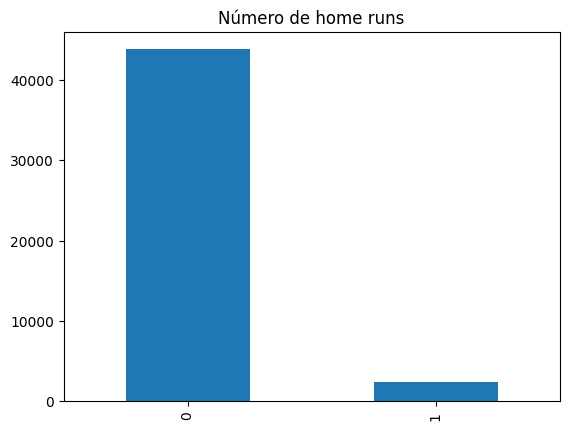

In [19]:
completa.is_home_run.value_counts().plot.bar(title='Número de home runs');

<Axes: ylabel='is_home_run'>

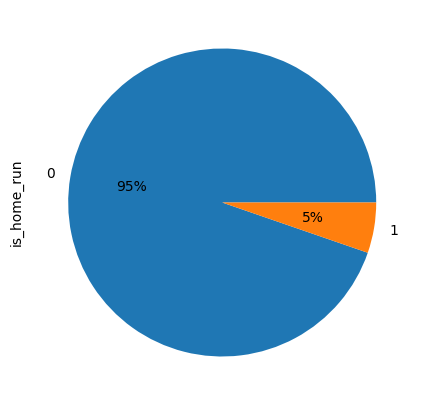

In [18]:
completa.is_home_run.value_counts().plot.pie(autopct='%1.0f%%',figsize=(5,5))

Luego de visualizar el gráfico, podemos ver que los valores de la salida no estan balanciados, ya que se tienen mas de 40000 (95% apróx) casos en los que no se tiene home run y solo menos de 5000 (5% apróx) donde si se tiene home run. Esta gran diferencia podría traer problemas a la hora de entrenar diferentes modelos, ya que estos podrían optar por responder siempre por el valor que aparece en la mayoría de los casos y en dicho caso no tratarían de predecir. En otras palabras se podrían producir problemas de underfitting.

### Selección de 5 variables de entrada y cómo afectan a la variable de salida.

Las 5 variables de entrada elegidas para dicho punto son:
- launch speed
- launch angle
- pitch_mph
- bearing
- name

#### Variable: launch_speed

In [111]:
# Distribución de la variable
px.histogram(completa, x='launch_speed', barmode='group', nbins=30)

In [110]:
# Realación entre la variable de entrada seleccionada y la variable de salida
px.histogram(completa, x='launch_speed', color='is_home_run', barmode='group')

Como conclusión podemos decir que la variable de entrada afecta a la variable de salida ya que cuando alcanza valores entre las 90 y las 110 millas por hora aproximadamente se empiezan a ver ejemplos de home run. Dichos valores describe una distribución simétrica.

#### Variable: launch_angle

In [112]:
# Distribución de la variable
px.histogram(completa, x='launch_angle', barmode='group', nbins=30)

In [24]:
# Realación entre la variable de entrada seleccionada y la variable de salida
px.histogram(completa, x='launch_angle', color='is_home_run', barmode='group')

Como conclusión del gráfico anterior podemos ver que los datos de dicha variable de entrada tienen afectan a los da las variables de salida porque podemos ver un rango de valores entre los 18 y 42 grados aproximadamente en los que se produce home run. DIcho rango describe una distribución simétrica de datos.

#### Variable: pitch_mph

In [21]:
# Distribución de la variable
px.histogram(completa, x='pitch_mph', barmode='group', nbins=30)

In [22]:
# Realación entre la variable de entrada seleccionada y la variable de salida
px.histogram(completa, x='pitch_mph', color='is_home_run', barmode='group', nbins=30)

En este caso podemos ver que los datos de salida dependen de los datos de la variable de entrada pero en menor medida, ya que tenemos una distribución más uniforme con un rango de valores que va desde el 70 hasta los 100 millas por hora aproximadamente.

#### Variable: bearing

<Axes: ylabel='bearing'>

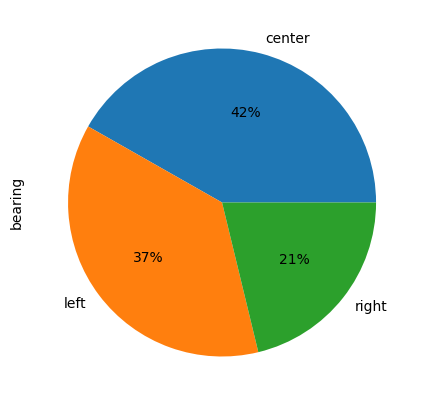

In [12]:
# Distribución de la variable
completa.bearing.value_counts().plot.pie(autopct='%1.0f%%',figsize=(5,5))

In [ ]:
# Realación entre la variable de entrada seleccionada y la variable de salida
px.histogram(completa, x='bearing', color='is_home_run', barmode='group')

Como se puede ver en este caso, la variable tiene poca importancia en la salida, ya que teniendo en cuenta los tipos de lanzamiento y su desigual distribución, los casos en que se producen home runs en general son similares.

#### Variable: name

<Axes: ylabel='name'>

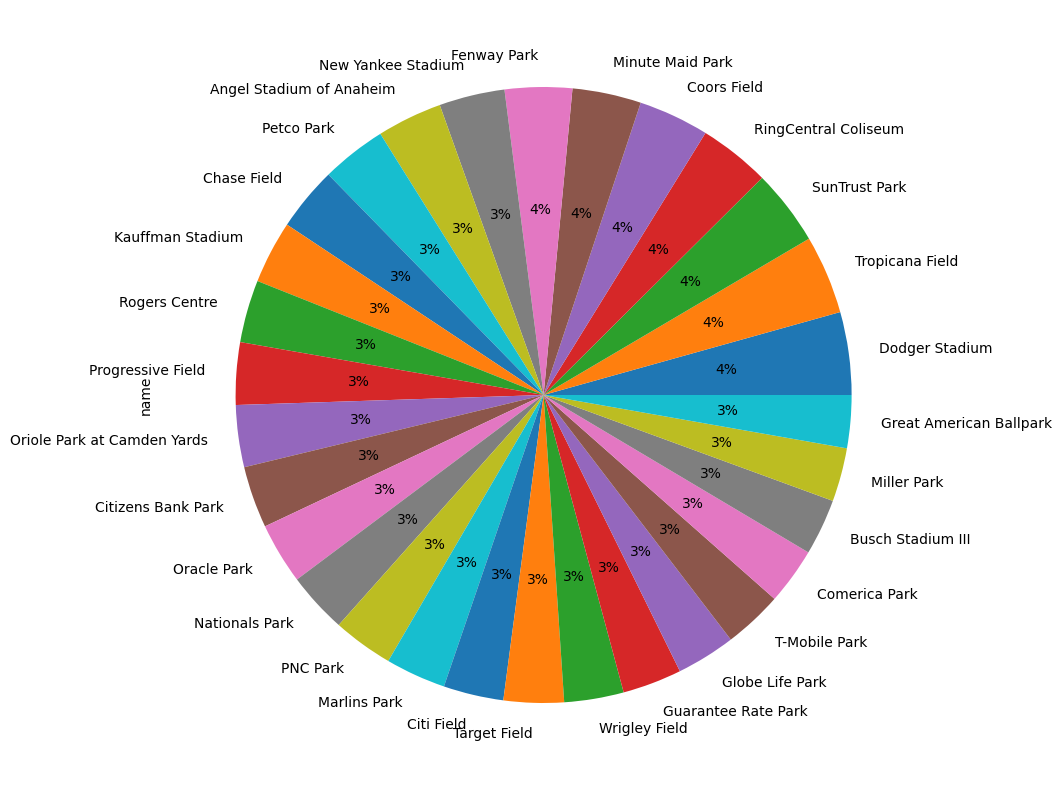

In [114]:
# Distribución de la variable
completa.name.value_counts().plot.pie(autopct='%1.0f%%',figsize=(10,10))

In [ ]:
# Realación entre la variable de entrada seleccionada y la variable de salida
px.histogram(completa, x='name', color='is_home_run', barmode='group')

Como se puede ver teniendo en cuenta la distribución y la relación con la variable de salida, podemos decir que la variable de entrada influye poco o casi nada en definir si una jugada es termina en home run o no.

### Variables de entrada elegidas y su transformación

In [ ]:
completa.sample(10)

Para utilizar el dataset en un modelo hay muchos cambios que se podrían aplicar a las variables. Los mismos se mencionan a continuación:

### Valores nulos y/o extremos

#### Valores nulos

In [ ]:
completa.isnull().sum()

Como se puede ver en la estadistica anterior hay valores nulos en las variables "launch_speed" media, "launch_angle" y "bb_type" eliminar. El tratamiento que se le podría dar a las dos primeras es el de completarlas con la media de obtenida de los otros casos o con los valores de los casos similares. Otra opción podría ser eliminar sus filas ya que se tienen muchos datos y no habría muchos problemas sin se sacan algunos. Con respecto a la variable "bb_type" lo que se puede hacer es eliminar las filas con los valores nulos, ya que son muy pocas.

#### Valores extremos

In [ ]:
# Convertimos en array a la columna launch_angle
launch_angles = np.array(completa.launch_angle)

# Armamos un diagrama de dispersión con la variable launch_angle.
angle_unique, counts = np.unique(launch_angles, return_counts = True)
size = counts * 3
colors = ['blue'] * len(angle_unique)
plt.axhline(1,color='k',linestyle='--')
plt.scatter(angle_unique,np.ones(len(angle_unique)),s=size,color=colors)
plt.yticks([])
plt.show()

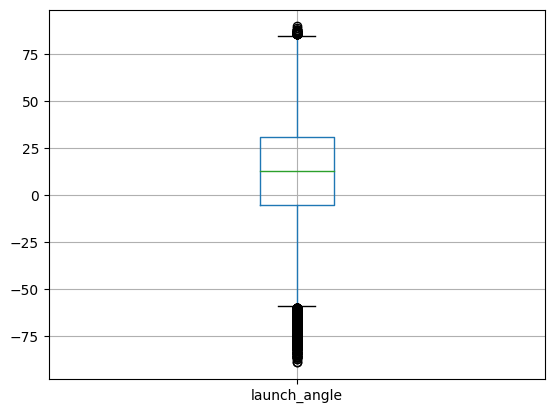

In [23]:
# Diagrama de caja de campo launch_angle
completa.boxplot('launch_angle');

In [ ]:
# Convertimos en array a la columna launch_speed
launch_speeds = np.array(completa.launch_speed)

# Armamos un diagrama de dispersión con la variable launch_speed.
speed_unique, counts = np.unique(launch_speeds, return_counts = True)
size = counts * 3
colors = ['blue'] * len(speed_unique)
plt.axhline(1,color='k',linestyle='--')
plt.scatter(speed_unique,np.ones(len(speed_unique)),s=size,color=colors)
plt.yticks([])
plt.show()

In [ ]:
# Diagrama de caja de campo launch_speed
completa.boxplot('launch_speed');

In [ ]:
plate_xs = np.array(completa.plate_x)

platex_unique, counts = np.unique(plate_xs, return_counts = True)
size = counts * 3
colors = ['blue'] * len(platex_unique)
plt.axhline(1,color='k',linestyle='--')
plt.scatter(platex_unique,np.ones(len(platex_unique)),s=size,color=colors)
plt.yticks([])
plt.show()

In [ ]:
completa.boxplot('plate_x');

In [ ]:
plate_zs = np.array(completa.plate_z)

platez_unique, counts = np.unique(plate_zs, return_counts = True)
size = counts * 3
colors = ['blue'] * len(platez_unique)
plt.axhline(1,color='k',linestyle='--')
plt.scatter(platez_unique,np.ones(len(platez_unique)),s=size,color=colors)
plt.yticks([])
plt.show()

In [ ]:
completa.boxplot('plate_z');

In [ ]:
pitch_mphs = np.array(completa.pitch_mph)

pitch_mph_unique, counts = np.unique(pitch_mphs, return_counts = True)
size = counts * 3
colors = ['blue'] * len(pitch_mph_unique)
plt.axhline(1,color='k',linestyle='--')
plt.scatter(pitch_mph_unique,np.ones(len(pitch_mph_unique)),s=size,color=colors)
plt.yticks([])
plt.show()

In [ ]:
completa.boxplot('pitch_mph');

De acuerdo a lo visto en los gráficos anteriores, las variables que poseen extremos son "plate_x", "plate_z", "pitch_mph", "launch_speed" y "launch_angle". Lo que se podría hacer con dichos datos es eliminarlos para que no afecten los resultados de los métricas.Cabe aclarar que las variables "lf_dim", "cf_dim", "rf_dim", "lf_w", "cf_w" y "rf_w" también presentan valores extremos, pero en estos casos se deben dejar porque hablan de las dimensiones de los estadios y por lo tanto no se deberían eliminar.

### Existencia de variables altamente correlacionadas con la variable "target"

/tmp/ipykernel_3182/2176654775.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(completa.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)


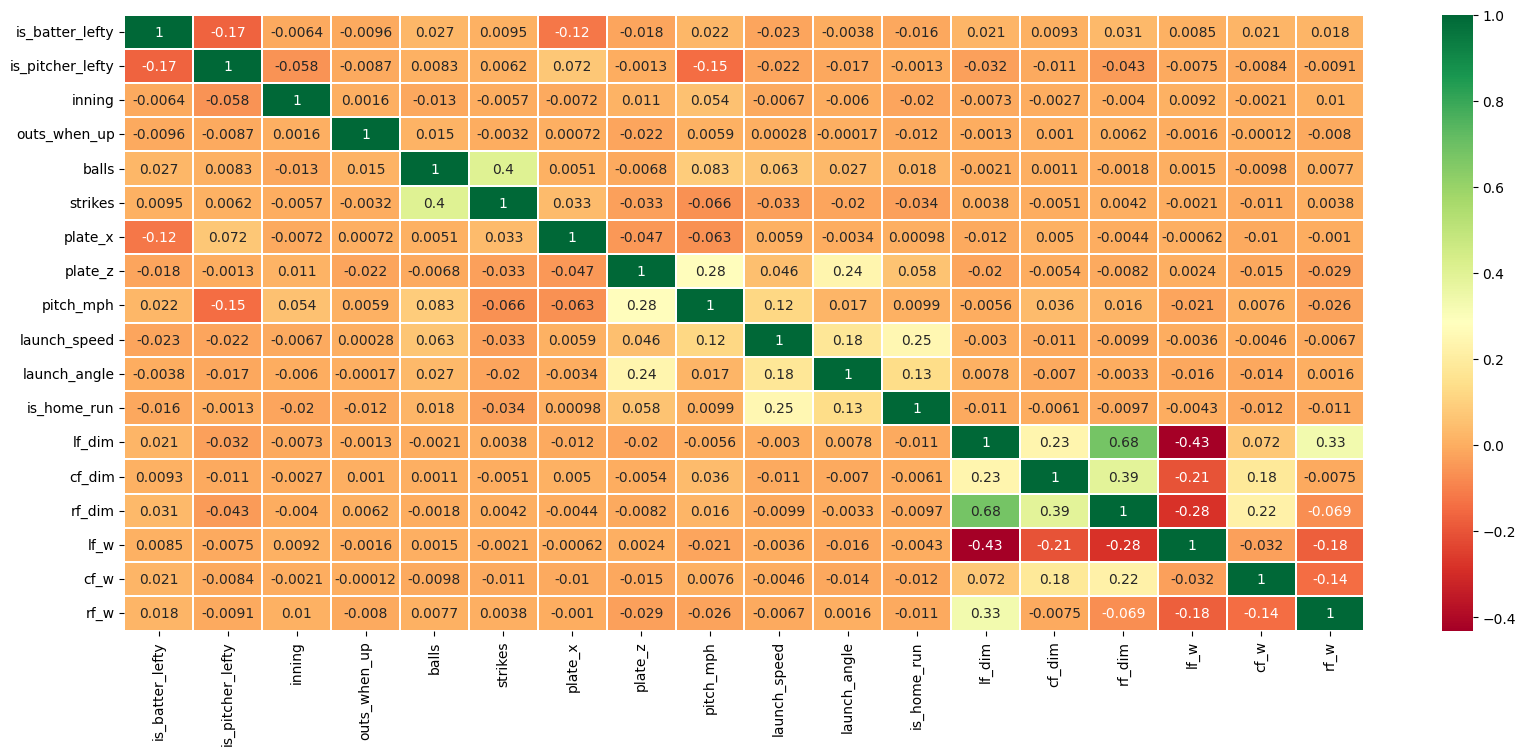

In [10]:
# Gráfico de colores de las principales variables

sns.heatmap(completa.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.show()

Como se ve en el gráfico de colores no existen variables altamente correlacionadas con la variable target, ya que la variables con mayor valor de correlación son "launch_speed" y "launch_angle" con 0,25 y 0,13 respectivamente. Consideramos que esto pasa por la cantidad de variables de entrada del sataset y por el gran desbalance entre los datos de categoría positiva y negativa (si es o no home run).

## 3. Hipótesis sobre los datos

### Hipótesis

Hipotésis 1: Hay una mayor tendencia de que la jugada sea home run cuando el ángulo de lanzamiento es mayor o igual a 20° y menor a 40°.

In [56]:
completa[(completa.launch_angle > 20) && (completa.launch_angle <= 40)].is_home_run.value_counts(normalize=True).sort_index().plot.pie(autopct='%1.0f%%',title='% de home runs en ángulos mayores a 20°');

SyntaxError: invalid syntax (4219801478.py, line 1)

<Axes: title={'center': '% de tiros con ángulo mayor a 20 y menor a 40 que fueron home run'}, ylabel='higher_launch_angle'>

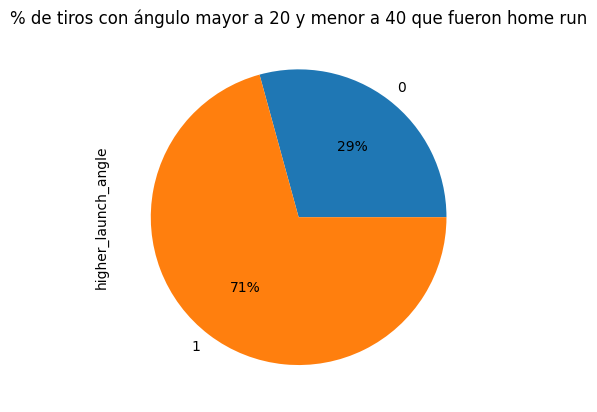

In [153]:
def two_conditions_h1(row):
    if (row['launch_angle'] >= 20.0) and (row['launch_angle'] < 40.0) and (row['launch_angle'] != 'nan'):
        return 1
    else:
        return 0
    
higher_launch_angle = completa.apply(two_conditions_h1, axis=1)
completa['higher_launch_angle'] = higher_launch_angle

completa[completa.is_home_run==1].higher_launch_angle.value_counts(normalize=True).sort_index().plot.pie(autopct='%1.0f%%', title=f'% de tiros con ángulo mayor a 20 y menor a 40 que fueron home run')

Se comprueba que la hipótesis 1 es verdadera

Hipótesis 2: Hay menos probabilidades de que se produzca un home run si el bearing es distinto de "rigth" y el tipo de bola es "fly_ball".

<Axes: title={'center': '% de tiros con ángulo mayor a 20 y menor a 40 que fueron home run'}, ylabel='center_bearing'>

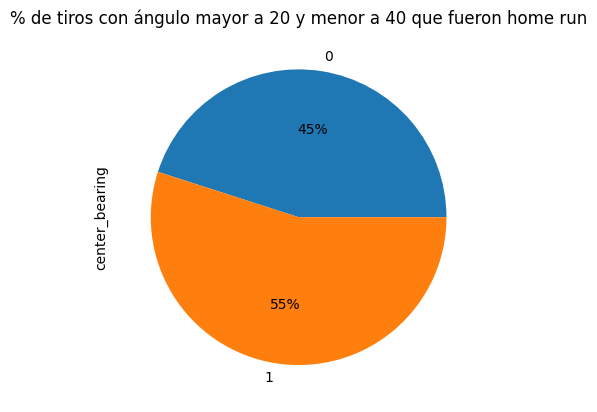

In [84]:
def two_conditions_h2(row):
    if (row['bearing'] != 'rigth') and (row['bb_type'] == 'fly_ball'):
        return 1
    else:
        return 0
    
center_bearing = completa.apply(two_conditions_h2, axis=1)
completa['center_bearing'] = center_bearing

completa[completa.is_home_run==1].center_bearing.value_counts(normalize=True).sort_index().plot.pie(autopct='%1.0f%%', title=f'% de tiros con ángulo mayor a 20 y menor a 40 que fueron home run')

La hipotésis es falsa

Hipótesis 3: Si el lanzador no es zurdo y la velocidad de la bola es mayor al promedio y bb_type es line drive, hay una probabilidad mator al 5 % de que se produzca un home run

In [85]:
completa.pitch_name.unique()

array(['Slider', '4-Seam Fastball', 'Changeup', 'Curveball', 'Sinker',
       'Cutter', 'Knuckle Curve', 'Split-Finger', 'Forkball'],
      dtype=object)

<Axes: title={'center': '% de tiros con ángulo mayor a 20 y menor a 40 que fueron home run'}, ylabel='condicion_3'>

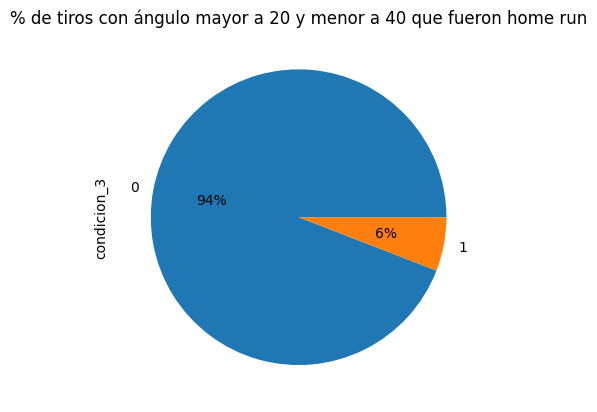

In [109]:
def two_conditions_h3(row):
    if (row['is_pitcher_lefty'] == 0) and (row['bb_type'] == 'fly_ball') and (row['pitch_mph'] < 89) and (row['pitch_name'] == 'Slider'):
        return 1
    else:
        return 0
    
condicion_3 = completa.apply(two_conditions_h3, axis=1)
completa['condicion_3'] = condicion_3

completa[completa.is_home_run==1].condicion_3.value_counts(normalize=True).sort_index().plot.pie(autopct='%1.0f%%', title=f'% de tiros con ángulo mayor a 20 y menor a 40 que fueron home run')

La hipotesis es verdadera

Describa y presente cualquier otro hallazgo que sea capaz de encontrar en los datos. Explique el impacto que podría tener en la creación de un modelo.

### Hallazgos

- Muchas variables, 29 para ser exactos, lo que puede volver más complejo el diseño del modelo de predicción. Como consecuencia a la hora de buscar una función para el modelo, esta va a tener que considerar muchos aspectos.
- Como se pudo observar anteriormente hay un desvalance imporatante en la variable de salida y muchos casos son parecidos lo que puede afectar al modelo en lo que respecta a la generalización para identificar la mejor predicción.
- Las correlaciones entre las distintas variables con la variable de salida no son tan importantes, por lo que no es muy fácil identificar cual de todas las variables tienen mayor peso. Esto se debe en parte a la gran variedad de casos que se pueden tener en los datos del dataset. Esto podría traer complicaciones a la hora de hacer el modelo y determinar las variables con mayor peso o más relevantes.